In [11]:
from rdkit import Chem
from rdkit.Chem import Draw
drugbankInput = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbankInput if m]

In [12]:
from rdkit.Chem.Scaffolds import MurckoScaffold

In [18]:
basicStructure = drugbank[222]
atomicScaffold = MurckoScaffold.GetScaffoldForMol(basicStructure)
atomicScaffold.Compute2DCoords()
graphScaffold = MurckoScaffold.MakeScaffoldGeneric(atomicScaffold)

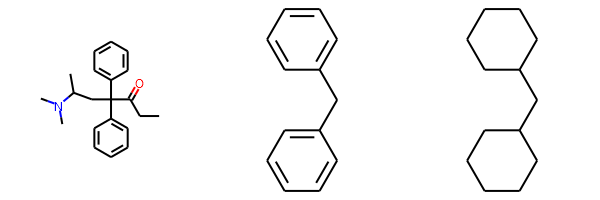

In [20]:
Draw.MolsToGridImage([basicStructure, atomicScaffold, graphScaffold])

In [74]:
# lepsi by to bylo ve funkci, tohle je osklive reseni
atomicScaffoldAll, graphScaffoldsAll = [], []
counter= 0

In [76]:
for drug in drugbank:
    try:
        atomicScaffoldAll.append(MurckoScaffold.GetScaffoldForMol(drug))
        atomicScaffoldAll[-1].Compute2DCoords()
        graphScaffoldsAll.append(MurckoScaffold.MakeScaffoldGeneric(atomicScaffoldAll[-1]))
    except:
        graphScaffoldsAll.append("none")
        counter += 1

In [78]:
counter

6

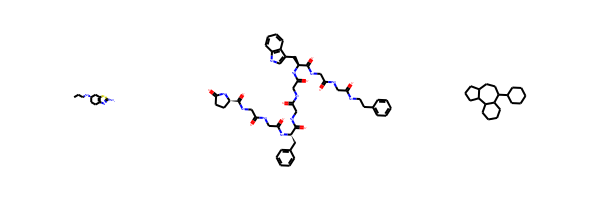

In [77]:
Draw.MolsToGridImage([drugbank[300], atomicScaffoldAll[300], graphScaffoldsAll[300]])

In [82]:
# nejfrekventovanejsi scaffoldy
canonicalSmiles = []
for scaff in graphScaffoldsAll:
    if scaff != "none":  
        canonicalSmiles.append(Chem.MolToSmiles(scaff))

In [90]:
smilesCounter = {}
for smiles in canonicalSmiles:
    if smiles in smilesCounter:
         smilesCounter[smiles] += 1
    else:
        smilesCounter[smiles] = 1

In [109]:
smilesCounter

{'CC(CCCC1CCCCC1)CCC(C)CCC(C)C1CCCC1C(C)CCC(C)CCC(C)CCC(C)C(CC(C)CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)C1CCCC1C(C)CCC(C)C1CCCC1C(C)CCC1CCCCC1)CC1CCCCC1': 3,
 'CC(CCC(C)CCC(C)C(CC(C)CCC(C)C(CC(C)C(CC1CCCC1)CC(C)C1CCC(C)C1)CC1CCC2CCCCC21)CC1CCCCC1)CCC(C)C1CCCC1': 3,
 'CC1CCC(C)CC(C(C)C2CCCC2)CCCCCC(C)CC(CC2CCCCC2)C(C)CC(CC2CCCCC2)C(C)CC1': 5,
 'CC(CCC(C)CCC(C)C(CC(C)CCC(C)C(CC1CCCCC1)CC(C)C(CC(C)CCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CCC(C)C1CCCC1': 3,
 'CC1CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)CCC(C)CC1': 2,
 'CC1CCCCCCC(CC(C)CCC2CCCCC2)C(C)CC(CC2CCCCC2)C(C)CC(CC2CCC3CCCCC32)C(C)CCC(C)CC1': 2,
 'C1CCCCC1': 959,
 'CC1CCCC2CCC(CCC3CCCCC3)CC12': 16,
 'C1CCCC1': 138,
 'C1CCC2C(C1)CCC2C1CCCC1': 130,
 '': 982,
 'CC1CC2CCCC2C1': 9,
 'CC1CCCC1': 40,
 'CC1CCCCC1CCC1CCCC2CCCC21': 11,
 'C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1': 1,
 'CC1CC(C)C2CC3CCCCC3CC2C1': 6,
 'C1CCC2CCCC2C1': 132,
 'C1CCC(CC2CCCC2)CC1': 39,
 'CC(CCC1CCC(C2CCCCC2)C1)CC(C)CCC1CCC(C2CCC3CCCCC32)C1': 17,
 'C1CCC2CCC

In [105]:
countedPolularSmiles = {}
popularSmiles = sorted(smilesCounter, key = smilesCounter.get, reverse = True)

print(popularSmiles[1])

C1CCCCC1


In [108]:
popularSmiles.count("C1CCCCC1")

1

In [106]:
for smiles in popularSmiles:
    countedPolularSmiles[smiles] = popularSmiles.count("C1CCCCC1")

In [103]:
len(countedPolularSmiles)

2072